In [47]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df=pd.read_csv(r'D:\movies.csv')



In [21]:
# Top 5 rows of the dataset
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [19]:
# check for missing data
for col in df.columns:
    missing_percent=np.mean(df[col].isnull())
    print('{}-{}%'.format(col, missing_percent))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.0%
gross-0.0%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [13]:
#data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [18]:
# Replace the data which is null as 0 for the two columns

df['budget']=df['budget'].fillna(0)

df['gross']=df['gross'].fillna(0)


In [20]:
#Change the datatype of budget and gross to int to remove 0 using pandas
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [108]:
# The release and the year is different so create a new column and extract the correct year from release

df['Year_correct']=df['released'].astype(str) # copy all the values from released column

df = df.astype({'Year_correct':'string'}) # convert the column object to string

In [112]:
# get only the year from the date fromat, if you get any series error use the str to convert to string and then list
df['Year_correct']=df['Year_correct'].str.split(" ").str[2] 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [115]:
# simply way to populate year 
#df['temp']=df['released'].astype(str).str.split(" ").str[2]

In [145]:
# check for any duplicates
#df['company'].drop_duplicates().sort_values(ascending=False)

In [118]:
# to display all the rows in column
pd.set_option("display.max_rows",None)

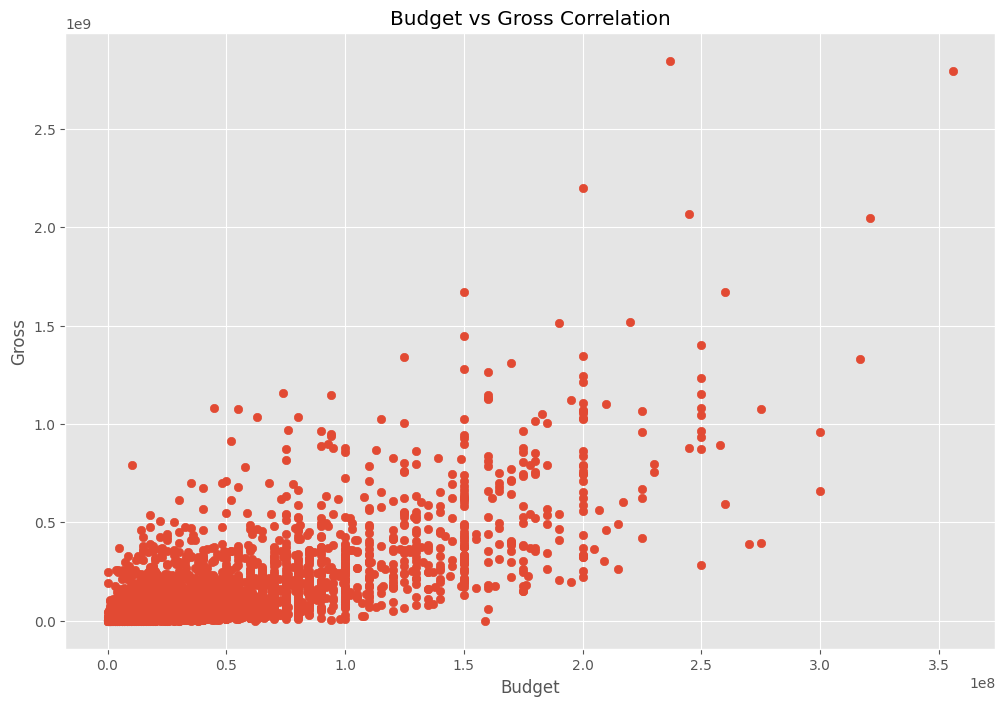

In [121]:
# visualize the data
plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget vs Gross Correlation")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

In [147]:
df=df.sort_values(by=['budget'],inplace=False,ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_correct,temp
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,41,41
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,40,40
7075,5145,5,0,2017,661,7.0,581000.0,2282,3518,524,55,317000000.0,1.332699e+09,2316,152.0,39,39
7066,2984,5,0,2017,2604,6.1,418000.0,2936,1979,220,55,300000000.0,6.579270e+08,2319,120.0,39,39
5060,4260,5,0,2007,2405,7.1,608000.0,996,4147,1321,55,300000000.0,9.609965e+08,2316,169.0,29,29


<AxesSubplot: xlabel='budget', ylabel='gross'>

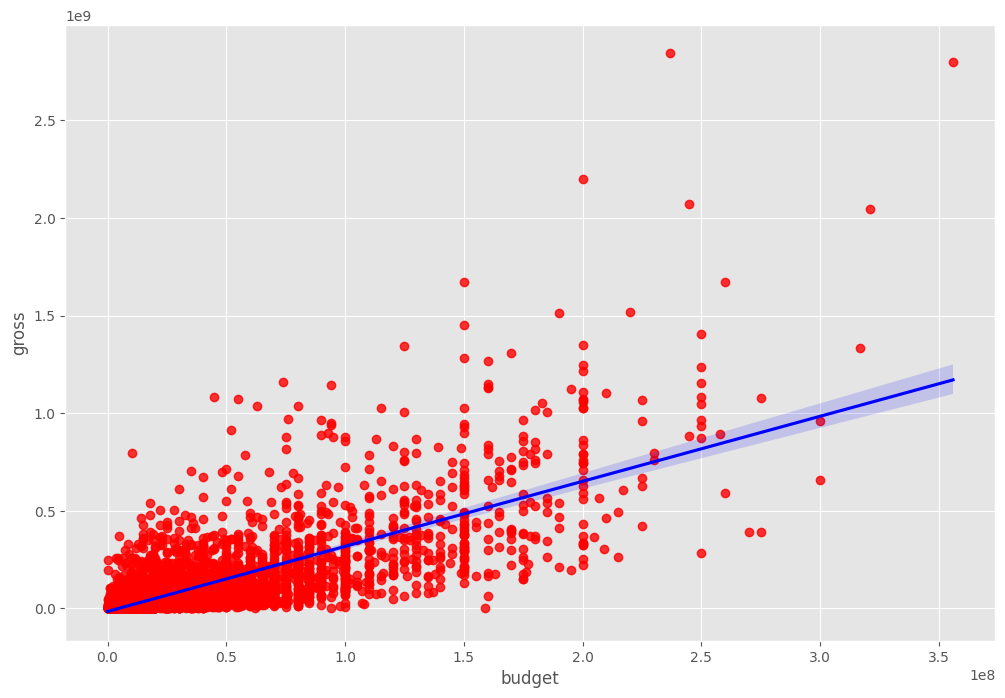

In [136]:
# Reg plot budget vs gross to see the correlation better
sns.regplot(x='budget', y='gross', data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [138]:
# how much exactly is the correlation
# this correlation only works on numerics not strings
# default correlation is pearson. there are other 2 called kendall,spearman
df.corr(method='pearson')

C:\Users\admin\AppData\Local\Temp\ipykernel_16836\827315915.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_16836\4273247934.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr(method='pearson')


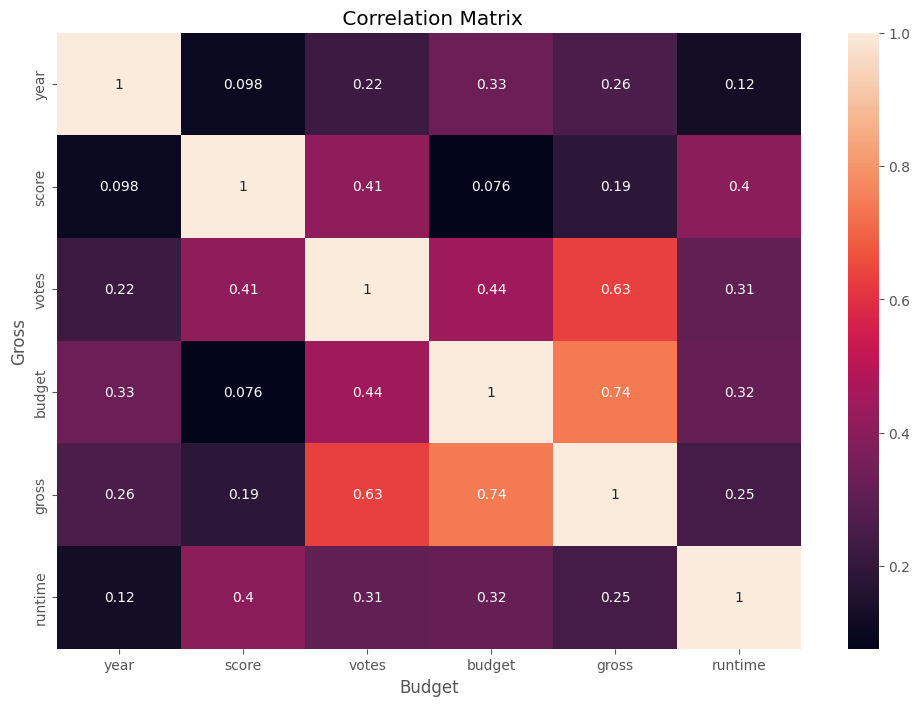

In [140]:
# high correlation bt budget and gross
corr_matrix=df.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title(" Correlation Matrix")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

In [143]:
# try to correlate with company by assigning the numerics
df_numeric=df

for col in df_numeric.columns:
    if(df_numeric[col].dtype=='object'):
        df_numeric[col]=df_numeric[col].astype('category')
        df_numeric[col]=df_numeric[col].cat.codes
        
df_numeric.head()
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_correct,temp
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,2,2
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,2,2
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,2,2
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,2,2
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,2,2


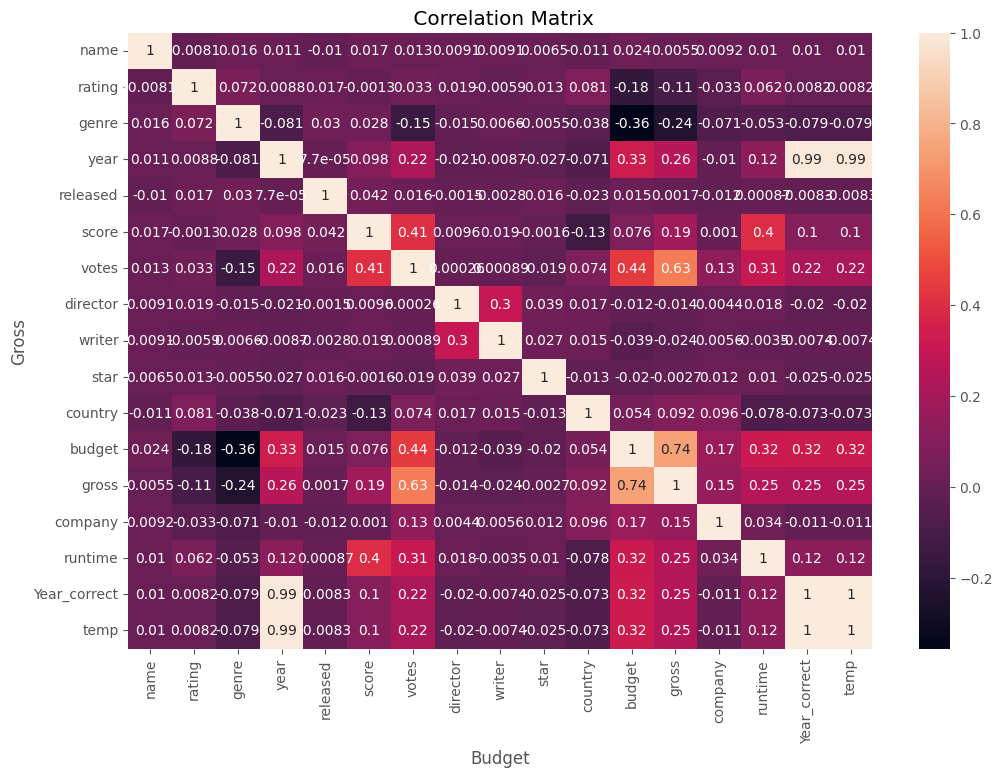

In [142]:
# high correlation bt other columns
corr_matrix=df_numeric.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title(" Correlation Matrix")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

In [ ]:
# votes and budget have high correlation to gross